<a href="https://colab.research.google.com/github/vpagonis/Classical_Mechanics_2nd_Edition/blob/main/Chapter13/Python_Codes_Chapter_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 13.2

In [ ]:
%reset -f

from sympy import symbols, diff, solve, Matrix

print('-'*28,'CODE OUTPUT','-'*29,'\n')

x, y = symbols('x,y')

f = y*(x + 1)
g = x*(y + 1)

#find the fixed points
fps = solve([f,g],[x,y])

fps1 = fps[1] #identify the first fixed point as origin
fps2 = fps[0]

print('The fixed points are, ', fps)

#compute the Jacobian matrix
A = Matrix([[diff(f,x), diff(f,y)],\
    [diff(g,x),diff(g,y)]])

A_fps1 = (A.subs([(x,fps1[0]),(y,fps1[1])]))
A_fps2 =  (A.subs([(x,fps2[0]),(y,fps2[1])]))

eigenvals1 = list(A_fps1.eigenvals().keys())
eigenvals2 = list(A_fps2.eigenvals().keys())

eigenvects1 = [list(ev[2][0]) for ev in A_fps1.eigenvects()]
eigenvects2 = [list(ev) for ev in A_fps2.eigenvects()[0][2]]

print('The eigenvalues for the origin are:', eigenvals1)
print('The eigenvalues for (-1,-1) are:', eigenvals2)

print('The eigenvectors for the origin are ', eigenvects1)
print('The eigenvectors for the (-1,-1) are ', eigenvects2)



---------------------------- CODE OUTPUT ----------------------------- 

The fixed points are,  [(-1, -1), (0, 0)]
The eigenvalues for the origin are: [-1, 1]
The eigenvalues for (-1,-1) are: [-1]
The eigenvectors for the origin are  [[-1, 1], [1, 1]]
The eigenvectors for the (-1,-1) are  [[1, 0], [0, 1]]


# Example 13.3

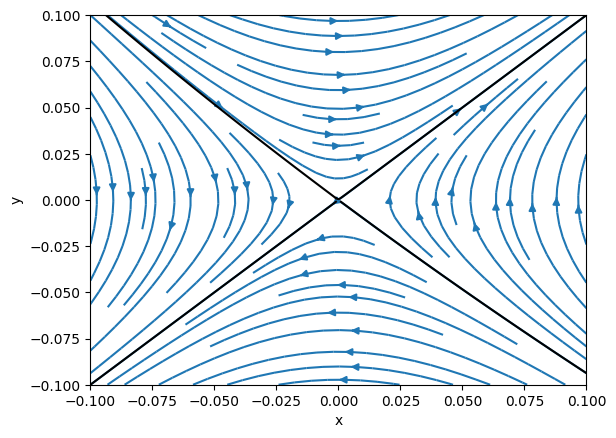

In [ ]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

times = np.linspace(0,8,100)

def deriv(z,t):
    x, y = z
    dzdt = [y*(x+1), x*(y+1)]
    return dzdt

ic1 = [-0.001,0.0009]
ic2 = [0.001, -0.001]
ic3 = [-0.001, 0.0011]
ic4 = [-0.001, -0.001]

soln1 = odeint(deriv, ic1, -times)
soln2 = odeint(deriv, ic2, -times)
soln3 = odeint(deriv, ic3, times)
soln4 = odeint(deriv, ic4, times)

X, Y = np.meshgrid(np.linspace(-0.1,0.1,100), \
    np.linspace(-0.1,0.1,100))

f_vec = Y*(X + 1)
g_vec = X*(Y + 1)

plt.streamplot(X, Y, f_vec, g_vec)
plt.plot(soln1[:,0],soln1[:,1],'k')
plt.plot(soln2[:,0],soln2[:,1],'k')
plt.plot(soln3[:,0],soln3[:,1],'k')
plt.plot(soln4[:,0],soln4[:,1],'k')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-0.1,0.1)
plt.ylim(-0.1,0.1)
plt.show()


# Example 13.4

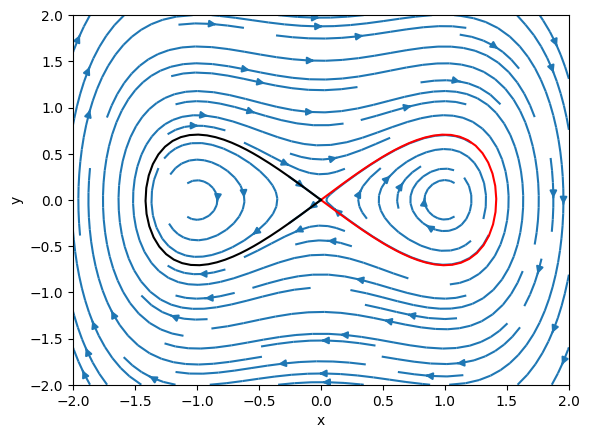

In [ ]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

times = np.linspace(0,20,200)

def deriv(z,t):
    x, y = z
    dzdt = [y, x - x**3]
    return dzdt

ic1 = [0.001,0.001]
ic2 = [-0.001, -0.001]


right_hc = odeint(deriv, ic1, times)
left_hc = odeint(deriv, ic2, times)


X, Y = np.meshgrid(np.linspace(-2,2,100), \
    np.linspace(-2,2,100))

f_vec = Y
g_vec = X - X**3

plt.streamplot(X, Y, f_vec, g_vec)
plt.plot(right_hc[:,0],right_hc[:,1],'r')
plt.plot(left_hc[:,0],left_hc[:,1],'k')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()


Example 13.5

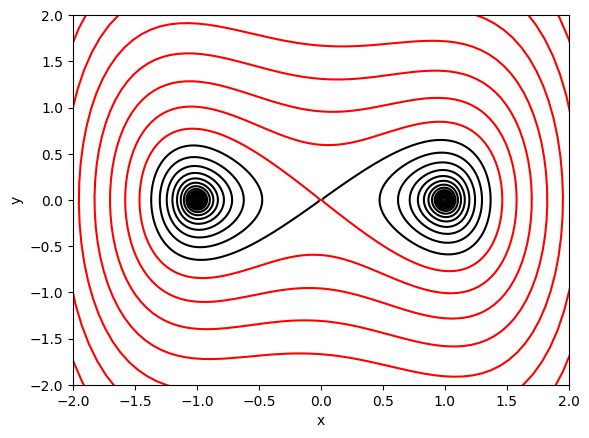

In [ ]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

times = np.linspace(0,80,2000)

def deriv(z,t):
    x, y = z
    dzdt = [y, x - x**3 - 0.1*y]
    return dzdt

ic1 = [0.01, 0.0]
ic2 = [-0.01, 0.0]

unstable_1 = odeint(deriv, ic1, times)
unstable_2 = odeint(deriv, ic2, times)
stable_1 = odeint(deriv, ic1, -times)
stable_2 = odeint(deriv, ic2, -times)

plt.plot(unstable_1[:,0],unstable_1[:,1],'k')
plt.plot(unstable_2[:,0],unstable_2[:,1],'k')
plt.plot(stable_1[:,0],stable_1[:,1],'r')
plt.plot(stable_2[:,0],stable_2[:,1],'r')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()


Example 13.6

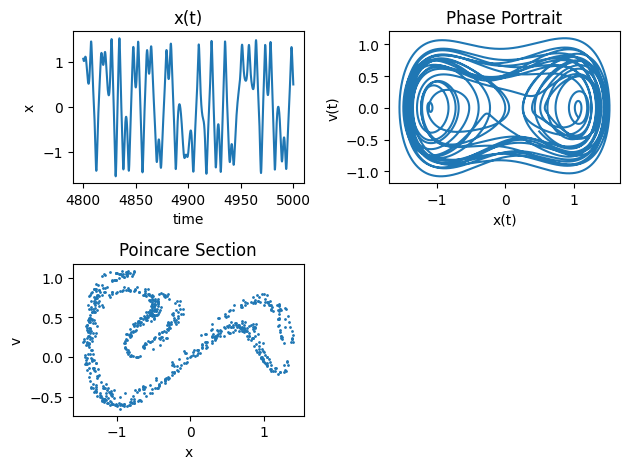

In [ ]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

dt = 0.001 #step size
times = np.arange(0,5000,dt)

def deriv(z,t):
    x, y = z
    dzdt = [y, -0.15*y + x - x**3 + 0.3*np.cos(t)]
    return dzdt

ics = [0,0]

soln = odeint(deriv,ics,times)

start = int(4800/dt) #starting index after transient

tau = int(2*np.pi/dt)

fig, ax = plt.subplots(nrows = 2, ncols = 2)

#plot x(t)
ax[0,0].plot(times[start:],soln[start:,0])
ax[0,0].set_xlabel('time')
ax[0,0].set_ylabel('x')
ax[0,0].set_title('x(t)')

#plot phase portrait
ax[0,1].plot(soln[start:,0],soln[start:,1])
ax[0,1].set_xlabel('x(t)')
ax[0,1].set_ylabel('v(t)')
ax[0,1].set_title('Phase Portrait')

#plot Poincare section
ax[1,0].scatter(soln[::tau,0],soln[::tau,1],s = 1)
ax[1,0].set_xlabel('x')
ax[1,0].set_ylabel('v')
ax[1,0].set_title('Poincare Section')

#delete unneeded graph
ax[1,1].set_axis_off()

plt.tight_layout()
plt.show()
